In [81]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Loan Approval Prediction Data

## Read Data

In [82]:
df = pd.read_csv('./raw_data/train.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [84]:
print(df.loc[1])

id                                  1
person_age                         22
person_income                   56000
person_home_ownership             OWN
person_emp_length                 6.0
loan_intent                   MEDICAL
loan_grade                          C
loan_amnt                        4000
loan_int_rate                   13.35
loan_percent_income              0.07
cb_person_default_on_file           N
cb_person_cred_hist_length          2
loan_status                         0
Name: 1, dtype: object


## Separate categorical from numerical columns

In [85]:
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade','cb_person_default_on_file']
num_cols = num_cols = [item for item in df.columns if item not in cat_cols]

## General structure of the data.

In [86]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Overview of numerical columns

In [87]:
df[num_cols].describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


#### => No extreme outliers.

### Plot categorical variables

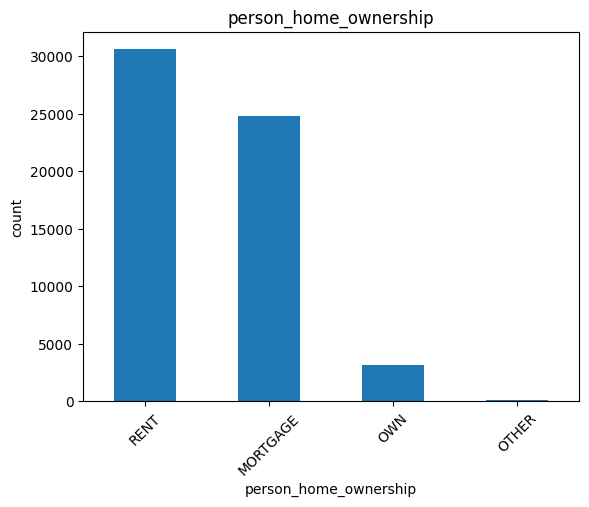

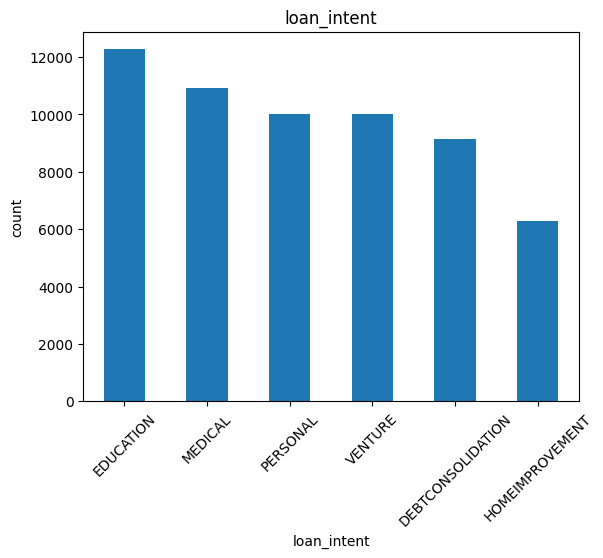

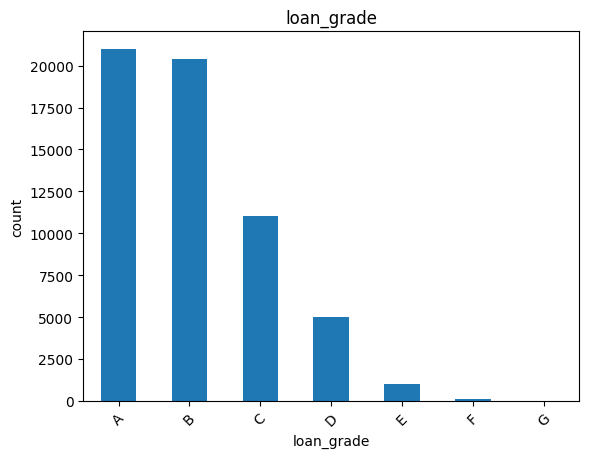

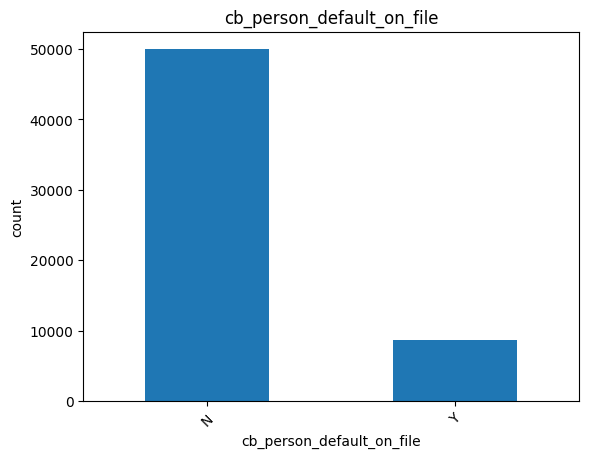

In [88]:
for i in cat_cols:
    counts = df[i].value_counts()
    counts.plot(kind = 'bar')
    plt.ylabel('count')
    plt.title(i)
    plt.xticks(rotation=45)
    plt.show()

### Plot numerical variables

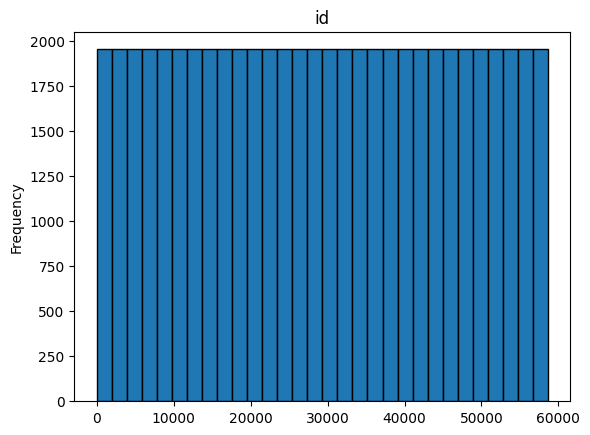

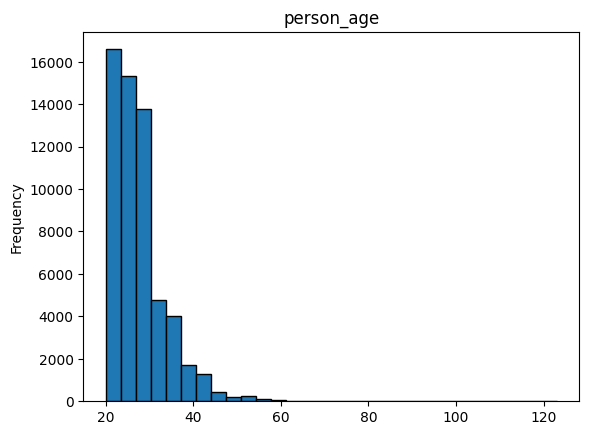

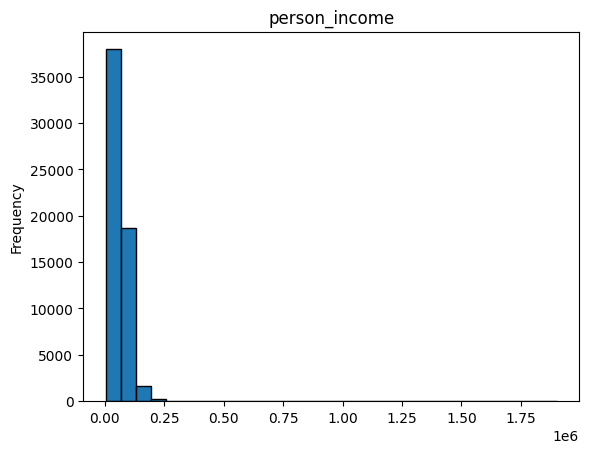

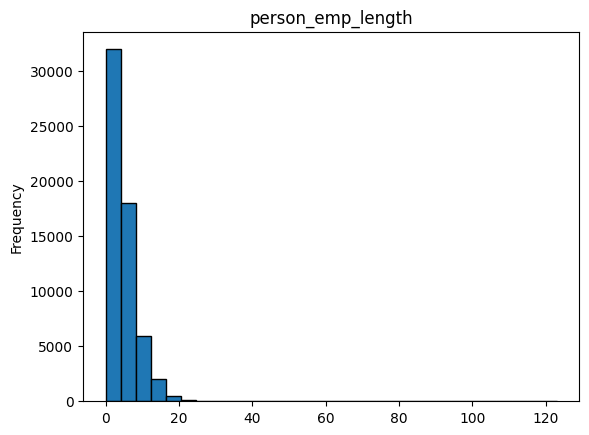

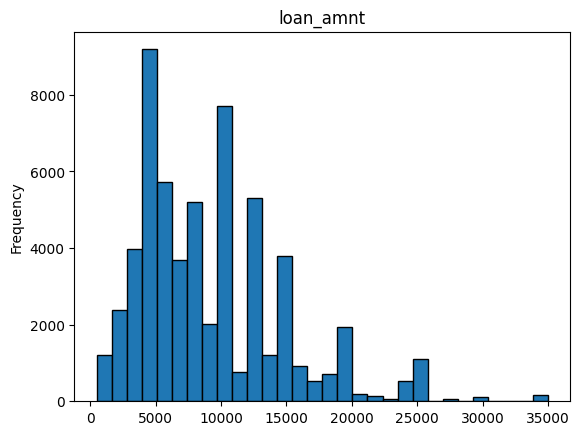

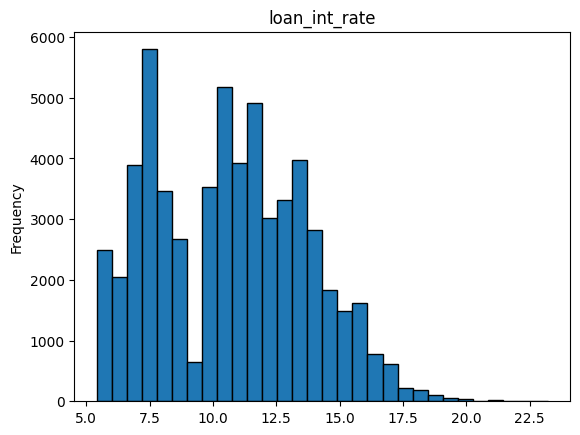

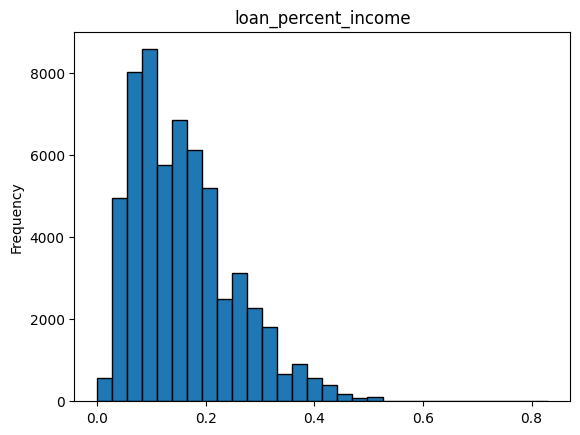

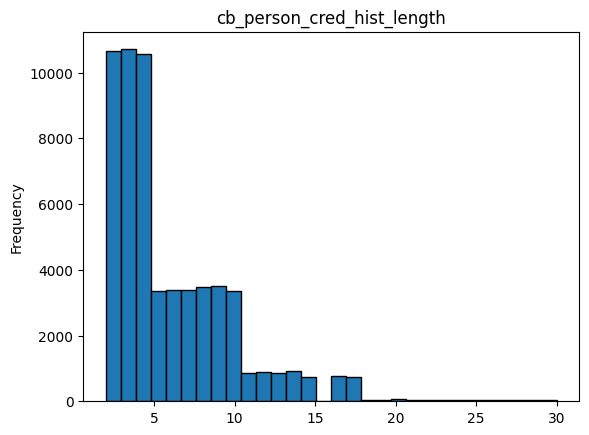

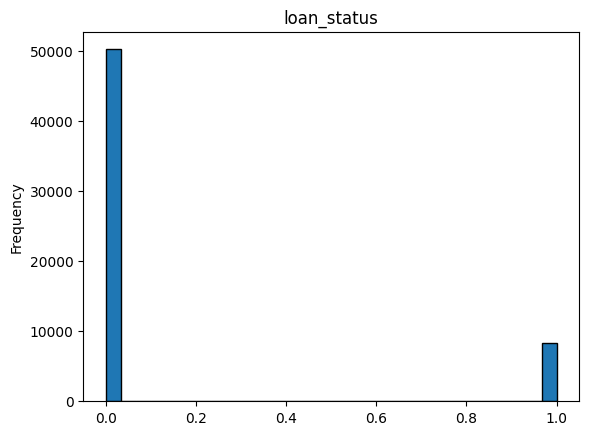

In [89]:
for i in num_cols:
    plt.hist(df[i], bins = 30, edgecolor = 'black')
    plt.ylabel('Frequency')
    plt.title(i)
    plt.show()

## Preprocessing

### Duplicates - No.

In [90]:
print(df.duplicated().sum())

0


### Missing values - No.

In [91]:
print(df.isna().sum())

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


### Overview of categorical data

In [92]:
for col in df[cat_cols]:
    print(f"{col}: {df[col].unique()}")

person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['EDUCATION' 'MEDICAL' 'PERSONAL' 'VENTURE' 'DEBTCONSOLIDATION'
 'HOMEIMPROVEMENT']
loan_grade: ['B' 'C' 'A' 'D' 'E' 'F' 'G']
cb_person_default_on_file: ['N' 'Y']


### Encode categorical ordinal data

In [93]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'N': 0, 'Y': 1})
# loan status
df['loan_grade'] = df['loan_grade'].map({'G': 1, 'F': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6 , 'A': 7}) # needs normalization later
df[cat_cols].head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,6,0
1,OWN,MEDICAL,5,0
2,OWN,PERSONAL,7,0
3,RENT,VENTURE,6,0
4,RENT,MEDICAL,7,0


In [94]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

### One-Hot-Encode categorical non-ordinal data

In [95]:
df = pd.get_dummies(df, columns = ['person_home_ownership','loan_intent'])
df.columns

Index(['id', 'person_age', 'person_income', 'person_emp_length', 'loan_grade',
       'loan_amnt', 'loan_int_rate', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length',
       'loan_status', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE'],
      dtype='object')

In [96]:
df.head()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,0,37,35000,0.0,6,6000,11.49,0.17,0,14,...,False,False,False,True,False,True,False,False,False,False
1,1,22,56000,6.0,5,4000,13.35,0.07,0,2,...,False,False,True,False,False,False,False,True,False,False
2,2,29,28800,8.0,7,6000,8.90,0.21,0,10,...,False,False,True,False,False,False,False,False,True,False
3,3,30,70000,14.0,6,12000,11.11,0.17,0,5,...,False,False,False,True,False,False,False,False,False,True
4,4,22,60000,2.0,7,6000,6.92,0.10,0,3,...,False,False,False,True,False,False,False,True,False,False


## Vizualizations

In [97]:
show_viz = False

### Correlations

<Axes: >

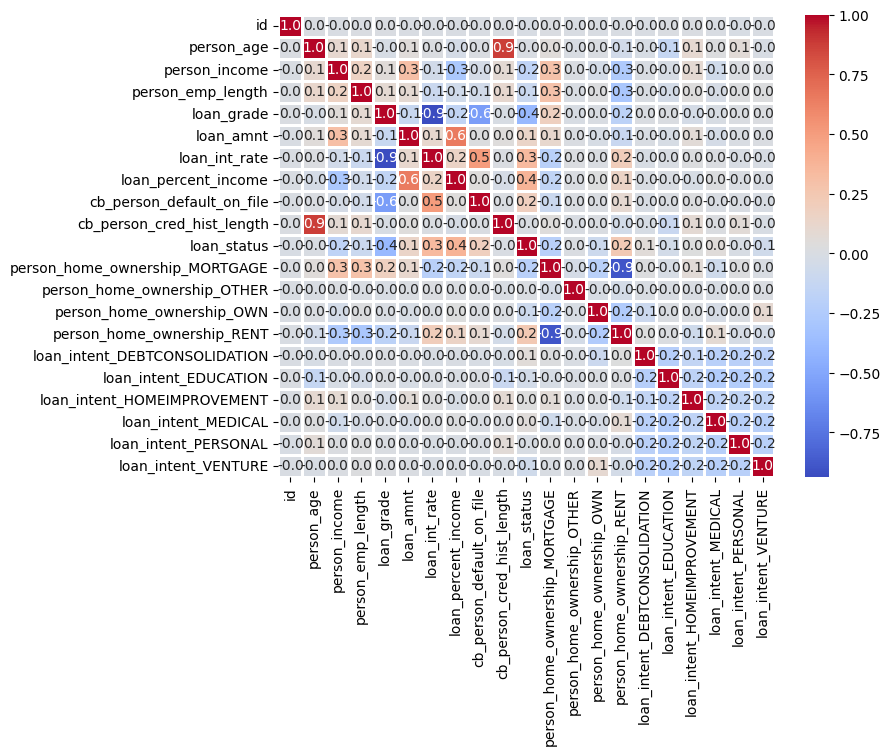

In [98]:
corr_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.01f', linewidths = 1)

### Pivot Tables

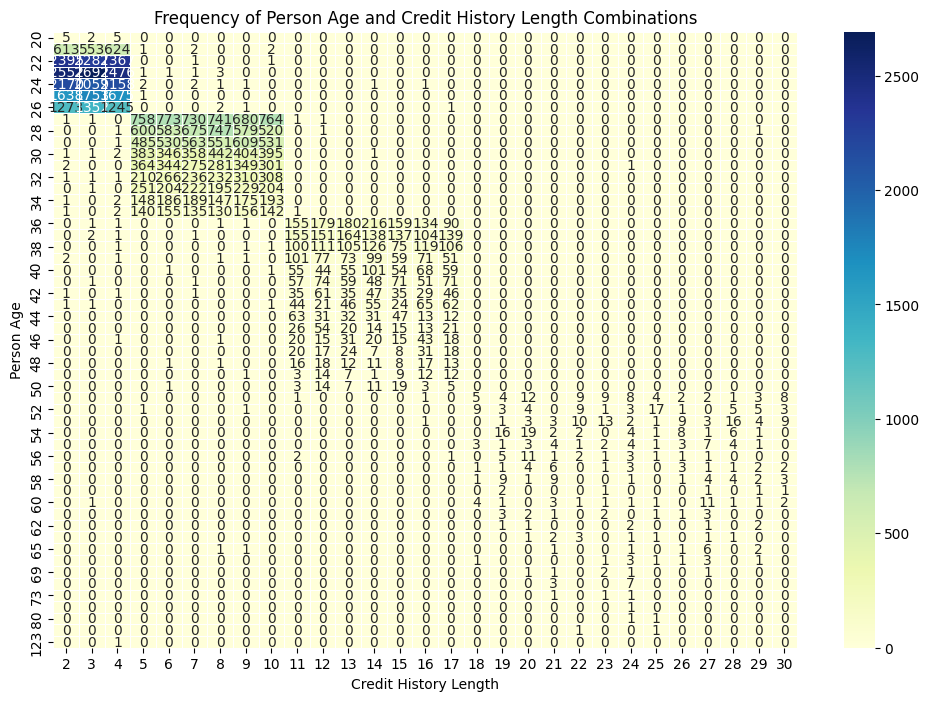

In [99]:
pivot = pd.pivot_table(df, index = 'person_age', columns = 'cb_person_cred_hist_length', aggfunc='size', fill_value = 0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap = 'YlGnBu', annot=True, fmt="d", linewidths = 0.5)
plt.title('Frequency of Person Age and Credit History Length Combinations')
plt.xlabel('Credit History Length')
plt.ylabel('Person Age')
plt.show()

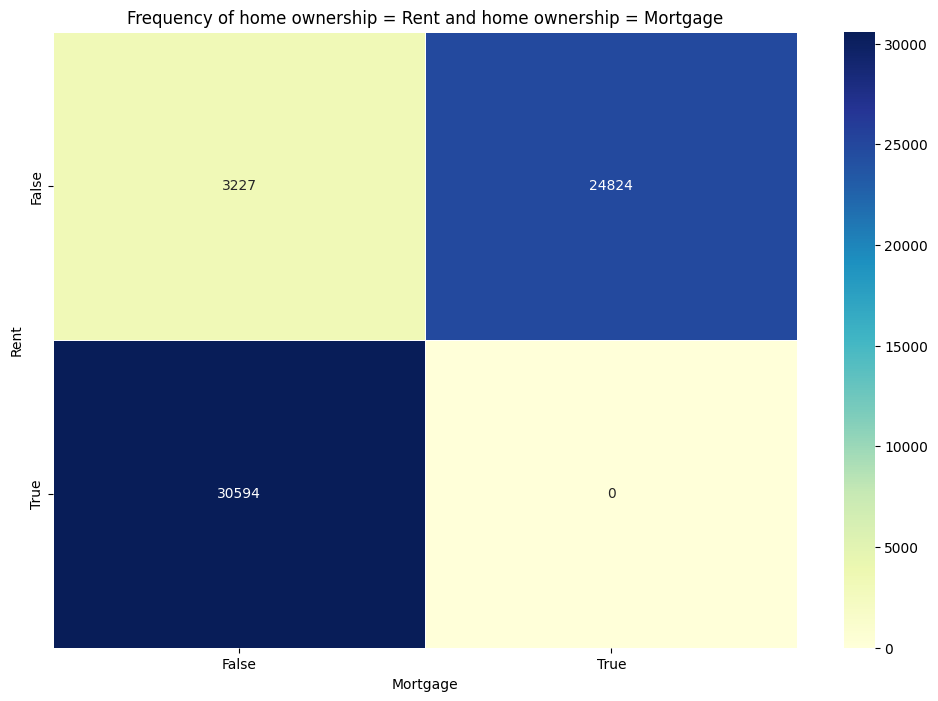

In [100]:
pivot = pd.pivot_table(df, index = 'person_home_ownership_RENT', columns = 'person_home_ownership_MORTGAGE', aggfunc='size', fill_value = 0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap = 'YlGnBu', annot=True, fmt="d", linewidths = 0.5)
plt.title('Frequency of home ownership = Rent and home ownership = Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Rent')
plt.show()

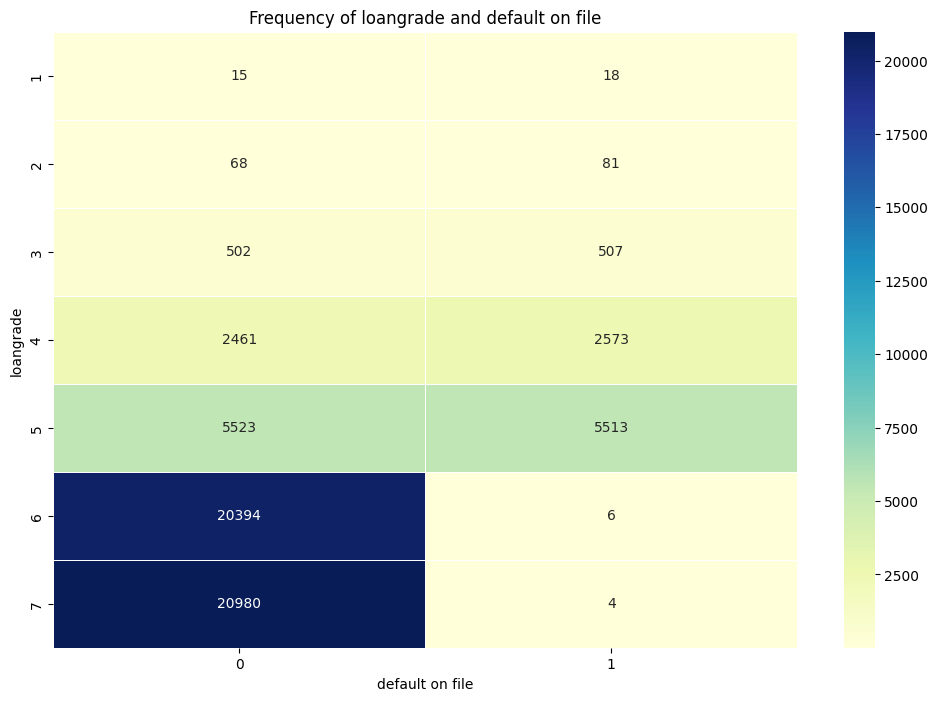

In [101]:
pivot = pd.pivot_table(df, index = 'loan_grade', columns = 'cb_person_default_on_file', aggfunc='size', fill_value = 0)
plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap = 'YlGnBu', annot=True, fmt="d", linewidths = 0.5)
plt.title('Frequency of loangrade and default on file')
plt.xlabel('default on file')
plt.ylabel('loangrade')
plt.show()

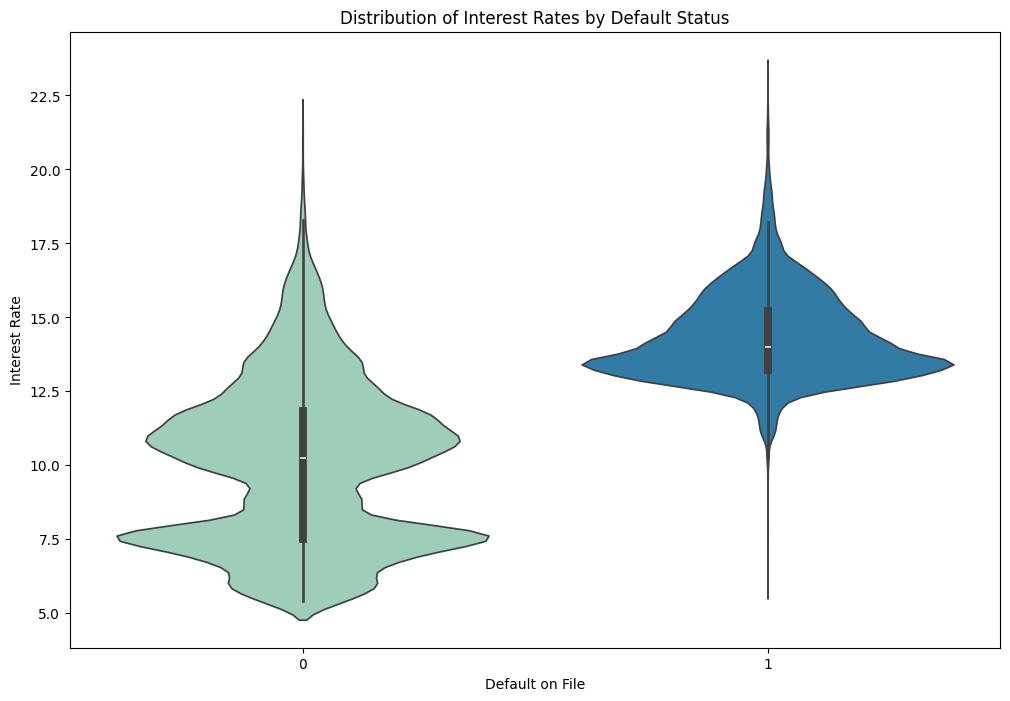

In [102]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='cb_person_default_on_file', y='loan_int_rate', hue='cb_person_default_on_file', palette='YlGnBu', legend=False)
plt.title('Distribution of Interest Rates by Default Status')
plt.xlabel('Default on File')
plt.ylabel('Interest Rate')
plt.show()

### Vizualizing Outliers

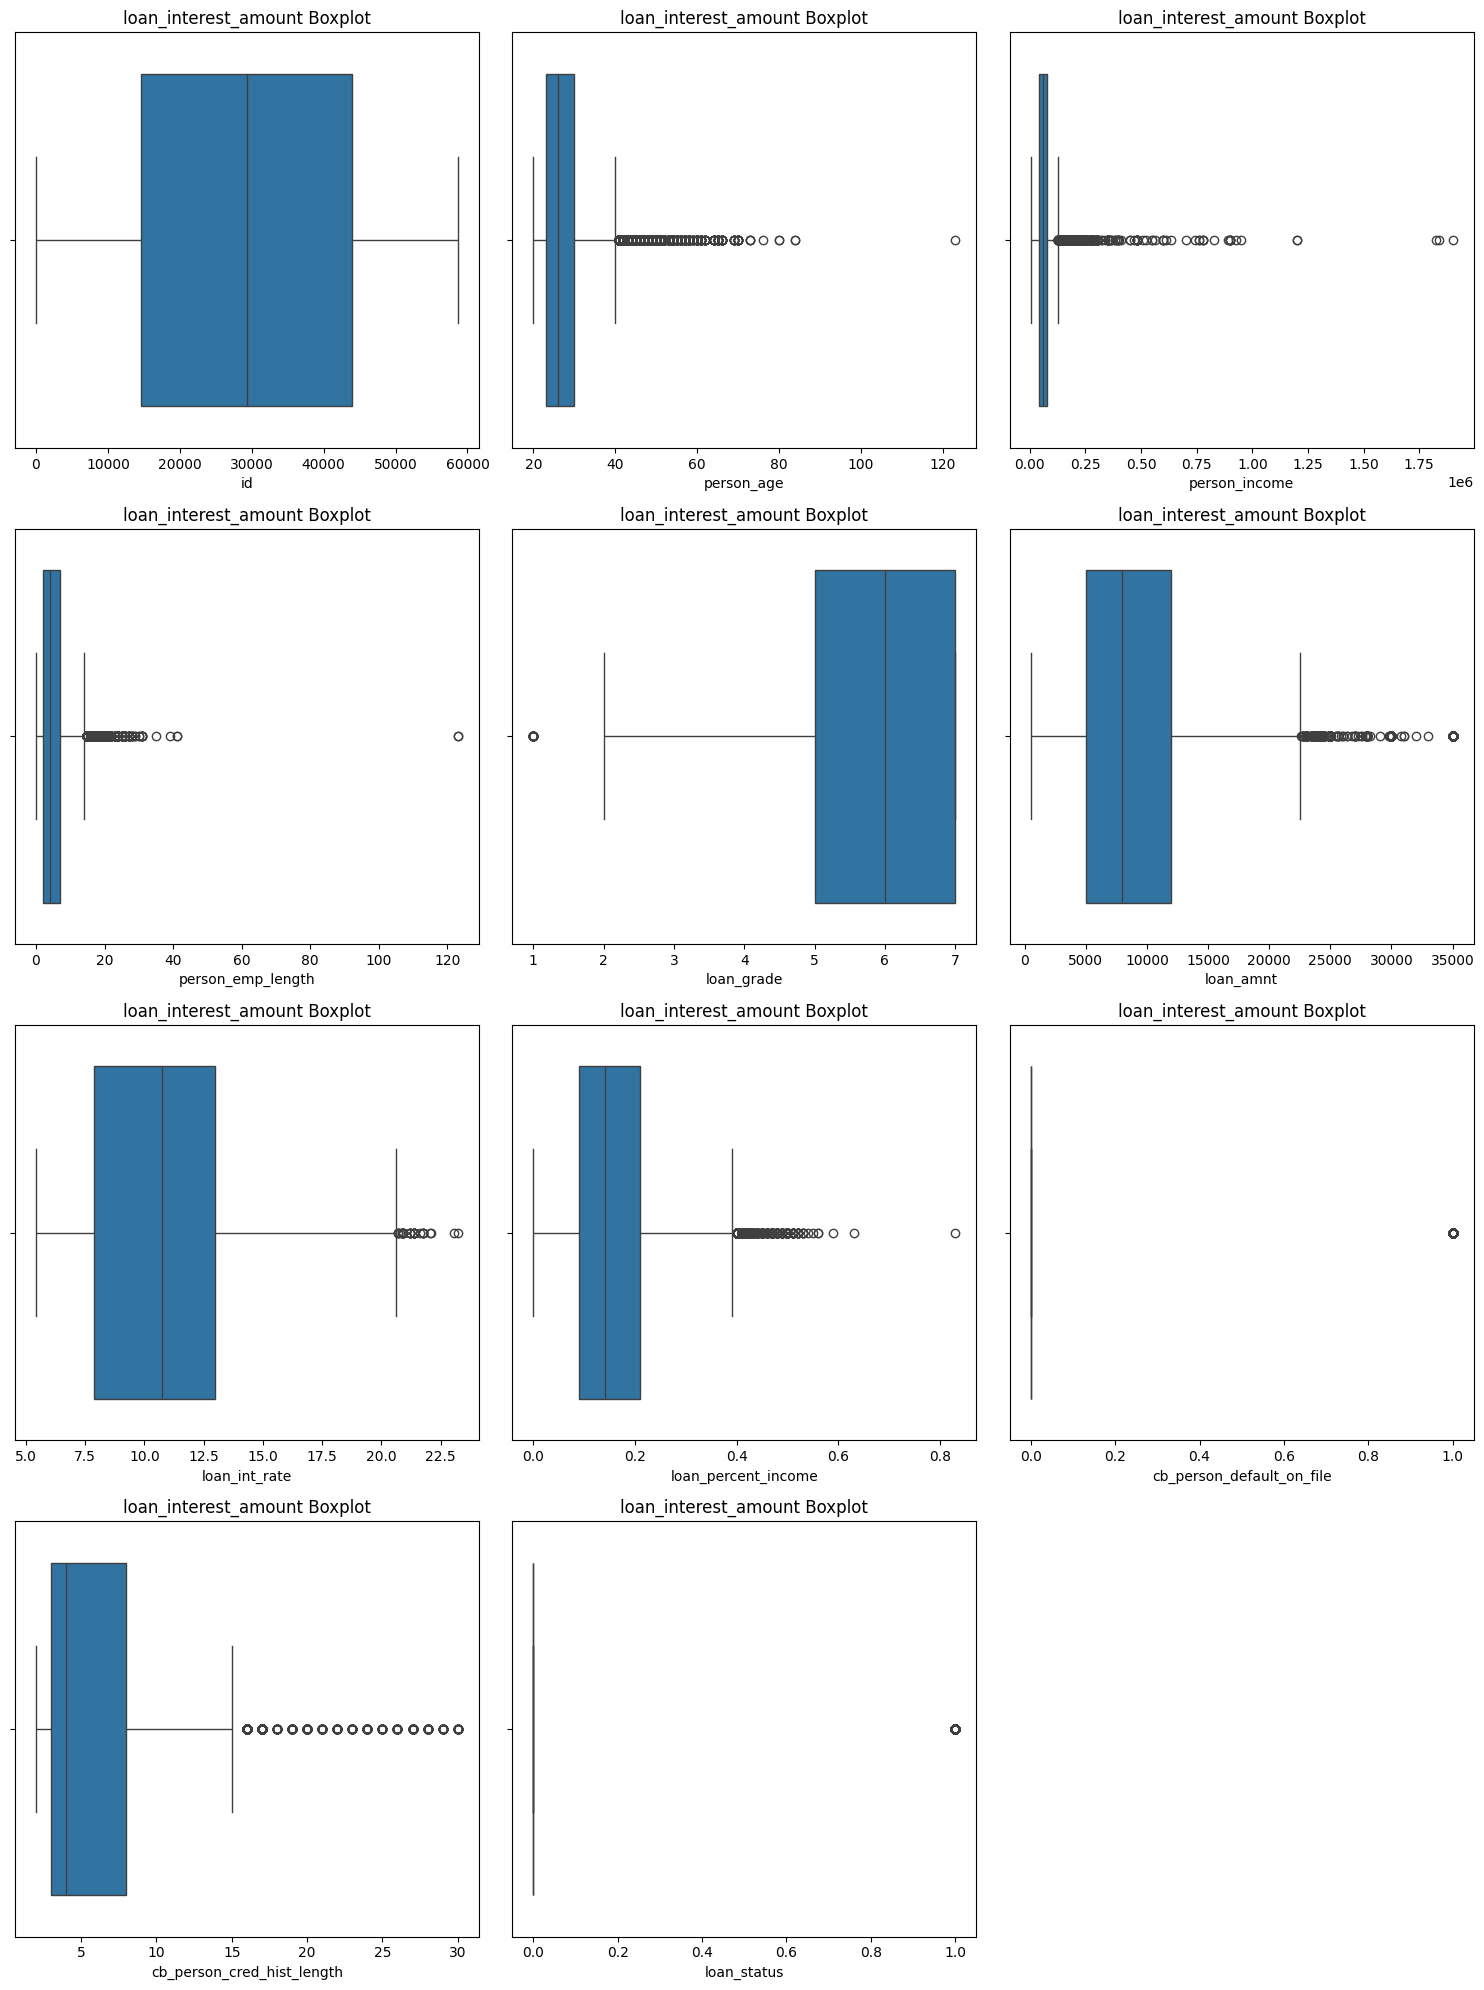

In [103]:
import math
stats_df = pd.DataFrame(index=df.select_dtypes(include=['float64', 'int64']).columns,
                        columns=['Q1', 'Q3', 'IQR'])
#print(stats_df.index)
num_features = len(stats_df.index)
num_cols = len(stats_df.columns)
num_rows = math.ceil(num_features / num_cols) 

fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axs = axs.flatten()

for i, col in enumerate(stats_df.index):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    stats_df.loc[col, 'Q1'] = Q1
    stats_df.loc[col, 'Q3'] = Q3
    stats_df.loc[col, 'IQR'] = IQR
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title(f"{column} Boxplot")


# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

### Removing outliers based on distance to the 25. and 75. quantile. 

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              58645 non-null  int64  
 1   person_age                      58645 non-null  int64  
 2   person_income                   58645 non-null  int64  
 3   person_emp_length               58645 non-null  float64
 4   loan_grade                      58645 non-null  int64  
 5   loan_amnt                       58645 non-null  int64  
 6   loan_int_rate                   58645 non-null  float64
 7   loan_percent_income             58645 non-null  float64
 8   cb_person_default_on_file       58645 non-null  int64  
 9   cb_person_cred_hist_length      58645 non-null  int64  
 10  loan_status                     58645 non-null  int64  
 11  person_home_ownership_MORTGAGE  58645 non-null  bool   
 12  person_home_ownership_OTHER     

In [105]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3.5 * IQR
    upper_bound = Q3 + 3.5 * IQR
    
    if col != 'loan_status':
        num_outliers_before = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        print(f"Number of outliers in {column} before removing: {num_outliers_before}")
    
        df = df.loc[lambda x: (x[col] >= lower_bound) & (x[col] <= upper_bound)]

        num_outliers_after = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        print(f"Number of outliers in {col} after removing: {num_outliers_after}")

Number of outliers in loan_interest_amount before removing: 0
Number of outliers in id after removing: 0
Number of outliers in loan_interest_amount before removing: 236
Number of outliers in person_age after removing: 0
Number of outliers in loan_interest_amount before removing: 373
Number of outliers in person_income after removing: 0
Number of outliers in loan_interest_amount before removing: 39
Number of outliers in person_emp_length after removing: 0
Number of outliers in loan_interest_amount before removing: 0
Number of outliers in loan_grade after removing: 0
Number of outliers in loan_interest_amount before removing: 0
Number of outliers in loan_amnt after removing: 0
Number of outliers in loan_interest_amount before removing: 0
Number of outliers in loan_int_rate after removing: 0
Number of outliers in loan_interest_amount before removing: 1
Number of outliers in loan_percent_income after removing: 0
Number of outliers in loan_interest_amount before removing: 8609
Number of out

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49318 entries, 0 to 58644
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              49318 non-null  int64  
 1   person_age                      49318 non-null  int64  
 2   person_income                   49318 non-null  int64  
 3   person_emp_length               49318 non-null  float64
 4   loan_grade                      49318 non-null  int64  
 5   loan_amnt                       49318 non-null  int64  
 6   loan_int_rate                   49318 non-null  float64
 7   loan_percent_income             49318 non-null  float64
 8   cb_person_default_on_file       49318 non-null  int64  
 9   cb_person_cred_hist_length      49318 non-null  int64  
 10  loan_status                     49318 non-null  int64  
 11  person_home_ownership_MORTGAGE  49318 non-null  bool   
 12  person_home_ownership_OTHER     49318

## Feature Engineering

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49318 entries, 0 to 58644
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              49318 non-null  int64  
 1   person_age                      49318 non-null  int64  
 2   person_income                   49318 non-null  int64  
 3   person_emp_length               49318 non-null  float64
 4   loan_grade                      49318 non-null  int64  
 5   loan_amnt                       49318 non-null  int64  
 6   loan_int_rate                   49318 non-null  float64
 7   loan_percent_income             49318 non-null  float64
 8   cb_person_default_on_file       49318 non-null  int64  
 9   cb_person_cred_hist_length      49318 non-null  int64  
 10  loan_status                     49318 non-null  int64  
 11  person_home_ownership_MORTGAGE  49318 non-null  bool   
 12  person_home_ownership_OTHER     49318

In [108]:
df['employment_gap'] = df['person_age'] - df['person_emp_length']
df['loan_interest_amount'] = df['loan_int_rate'] / 100 * df['loan_amnt']
df[''] =

count    49318.000000
mean        22.582181
std          6.320871
min          2.000000
25%         17.000000
50%         22.000000
75%         26.000000
max         54.000000
Name: employment_gap, dtype: float64

## Training models
#### Normalization (MinMaxScaler, because no normal distribution and values should be between 0 and 1 and there are no extreme Outliers)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_norm = ['person_age', 'person_income', 'person_emp_length', 'loan_grade', 'loan_amnt', 
                'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length','loan_interest_amount','employment_gap']
cols = [col for col in df.columns if col != 'loan_status']
X = df[cols]
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

# Normalization
X_train[cols_to_norm] = scaler.fit_transform(X_train[cols_to_norm])
X_test[cols_to_norm] = scaler.transform(X_test[cols_to_norm])

model_lr = LogisticRegression(max_iter=7000)

model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)

score = roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print('roc_auc: ', score)
print('accuracy: ', acc)
print('Classification Report: \n', report)

roc_auc:  0.7200336904122778
accuracy:  0.9234590429845905
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      8751
           1       0.77      0.46      0.57      1113

    accuracy                           0.92      9864
   macro avg       0.85      0.72      0.77      9864
weighted avg       0.92      0.92      0.91      9864

